# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
import re
import csv
from collections import Counter

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Function to generate N-grams
def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

# Function to extract noun phrases
def extract_noun_phrases(text):
    # Assuming a simple noun phrase extraction based on consecutive nouns
    words = text.split()
    noun_phrases = []
    current_phrase = []
    for word in words:
        if word.isalnum() and word.isalpha():  # Check if word is alphanumeric and consists only of alphabetic characters
            current_phrase.append(word)
        elif current_phrase:  # Non-noun encountered, add the current phrase if it's not empty
            noun_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if current_phrase:  # Add the last phrase if not already added
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

# Read dataset from CSV file
def read_dataset_from_csv(file_path):
    dataset = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            dataset.append(row[0])  # Assuming the text is in the first column of each row
    return dataset

# the path to your CSV file
csv_file_path = '/content/movie_reviews_with_ratings (1) (2).csv'

# Read dataset from CSV file
dataset = read_dataset_from_csv(csv_file_path)

# Preprocess dataset
preprocessed_dataset = [preprocess_text(text) for text in dataset]

# (1) Count the frequency of all the N-grams (N=3)
n = 3
all_ngrams = [generate_ngrams(text, n) for text in preprocessed_dataset]
all_ngrams_flat = [ngram for sublist in all_ngrams for ngram in sublist]
ngram_counts = Counter(all_ngrams_flat)

# Calculate bigram probabilities
bigrams = [(ngram[i], ngram[i+1]) for ngrams in all_ngrams for ngram in ngrams for i in range(len(ngram)-1)]
bigram_counts = Counter(bigrams)
unigram_counts = Counter([word for ngrams in all_ngrams for ngram in ngrams for word in ngram])
bigram_probabilities = {bigram: bigram_counts[bigram] / unigram_counts[bigram[0]] if unigram_counts[bigram[0]] != 0 else 0.0 for bigram in bigram_counts}

# (3) Extract all the noun phrases and calculate the relative probabilities of each review
all_noun_phrases = [extract_noun_phrases(text) for text in dataset]
max_freq_noun_phrases = Counter([noun for sublist in all_noun_phrases for noun in sublist])
relative_probabilities = {noun: max_freq_noun_phrases[noun] / max(max_freq_noun_phrases.values()) for noun in max_freq_noun_phrases}

# Print out the result
print("N-gram Frequencies:")
print("N-gram\t\tFrequency")
for ngram, count in ngram_counts.items():
    print(' '.join(ngram), "\t", count)

print("\nBigram Probabilities:")
print("Bigram\t\tProbability")
for bigram, probability in bigram_probabilities.items():
    print(' '.join(map(str, bigram)), "\t", probability)

print("\nRelative Probabilities of Noun Phrases:")
print("Review\t\t", end="")
for noun in relative_probabilities.keys():
    print(noun, "\t", end="")
print()
for i, review in enumerate(dataset):
    print(f"Review {i+1}\t", end="")
    for noun in relative_probabilities.keys():
        if noun in all_noun_phrases[i]:
            print(relative_probabilities[noun], "\t", end="")
        else:
            print("0\t", end="")
    print()










Streaming output truncated to the last 5000 lines.
realised what 	 0.6666666666666666
the nature 	 0.0019138755980861245
nature of 	 0.6666666666666666
the connection 	 0.0019138755980861245
connection between 	 0.6666666666666666
between a 	 0.3333333333333333
a barbie 	 0.011881188118811881
barbie and 	 0.0967741935483871
the girl 	 0.0019138755980861245
girl who 	 0.6666666666666666
who plays 	 0.09523809523809523
plays with 	 0.3333333333333333
real world 	 0.43333333333333335
world what 	 0.02631578947368421
what would 	 0.027777777777777776
would happen 	 0.04081632653061224
happen if 	 0.6666666666666666
if barbie 	 0.05128205128205128
barbie were 	 0.010752688172043012
were put 	 0.03333333333333333
put back 	 0.2222222222222222
back in 	 0.1111111111111111
the box 	 0.0019138755980861245
box why 	 0.6666666666666666
why is 	 0.21052631578947367
is gloria 	 0.007782101167315175
gloria america 	 0.6666666666666666
america ferrera 	 0.3333333333333333
ferrera the 	 0.666666666666

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
import csv
import re
import math

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Function to calculate term frequency (TF) for a document
def calculate_tf(document):
    words = document.split()
    word_count = len(words)
    tf = {}
    for word in words:
        tf[word] = tf.get(word, 0) + 1 / word_count
    return tf

# Function to calculate inverse document frequency (IDF) for a collection of documents
def calculate_idf(documents):
    num_documents = len(documents)
    idf = {}
    for document in documents:
        words = set(document.split())
        for word in words:
            idf[word] = idf.get(word, 0) + 1
    for word, freq in idf.items():
        idf[word] = math.log(num_documents / (freq + 1))
    return idf

# Function to calculate TF-IDF weights for a document using given TF and IDF
def calculate_tfidf(tf, idf):
    tfidf = {}
    for word, freq in tf.items():
        tfidf[word] = freq * idf.get(word, 0)  # Fix KeyError by using .get() method
    return tfidf

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1[word] * vec2.get(word, 0) for word in vec1)
    magnitude1 = math.sqrt(sum(freq ** 2 for freq in vec1.values()))
    magnitude2 = math.sqrt(sum(freq ** 2 for freq in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

# Read data from CSV file
def read_data_from_csv(file_path):
    documents = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if row:  # Check if row is not empty
                documents.append(row[0])  # Assuming the text is in the first column of each row
    return documents

# Path to the CSV file
csv_file_path = '/content/movie_reviews_with_ratings (1) (2).csv'

# Sample query
query = "An outstanding movie with a haunting performance and best character development"

# Read documents from CSV
documents = read_data_from_csv(csv_file_path)

# Preprocess documents and query
preprocessed_documents = [preprocess_text(doc) for doc in documents]
preprocessed_query = preprocess_text(query)

# Calculate TF for documents and query
tf_documents = [calculate_tf(doc) for doc in preprocessed_documents]
tf_query = calculate_tf(preprocessed_query)

# Calculate IDF for documents
idf = calculate_idf(preprocessed_documents)

# Calculate TF-IDF weights for documents and query
tfidf_documents = [calculate_tfidf(tf_doc, idf) for tf_doc in tf_documents]
tfidf_query = calculate_tfidf(tf_query, idf)

# Compute cosine similarity between query and documents
similarities = [cosine_similarity(tfidf_query, tfidf_doc) for tfidf_doc in tfidf_documents]

# Rank documents based on cosine similarity
ranked_documents = sorted(zip(documents, similarities), key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranked Documents:")
for rank, (doc, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Similarity = {similarity:.4f}, Document = '{doc}'")






Ranked Documents:
Rank 1: Similarity = 0.0773, Document = '8.5/10
While i'm not so sure at first, the movie kept getting even more fun, entertaining, and definitely better, also surprisingly deal with a legit serious stuff, Barbie is a weirdly fun movie that fills with this very interesting concept, definitely the first time that's ever done, Greta Gerwig has created this whole new style of filmmaking specifically for Barbie, from the intentionally weird yet creative editing, some awkward and cringe scene, i found the comedy so funny instead of cringe, Barbie is one of the most original movie of the year and also one of the most original movie i've seen in a while, we all know Margot Robbie and Ryan Gosling is gonna carry the movie and they are, but Will Ferrell, Simu Liu, and the whole rest of the cast were also great and entertaining, the soundtrack was just great, except Nicki Minaj and Ice Spice "Barbie World" song that are just absolutely terrible, but Billie Eilish "What Was I Ma

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

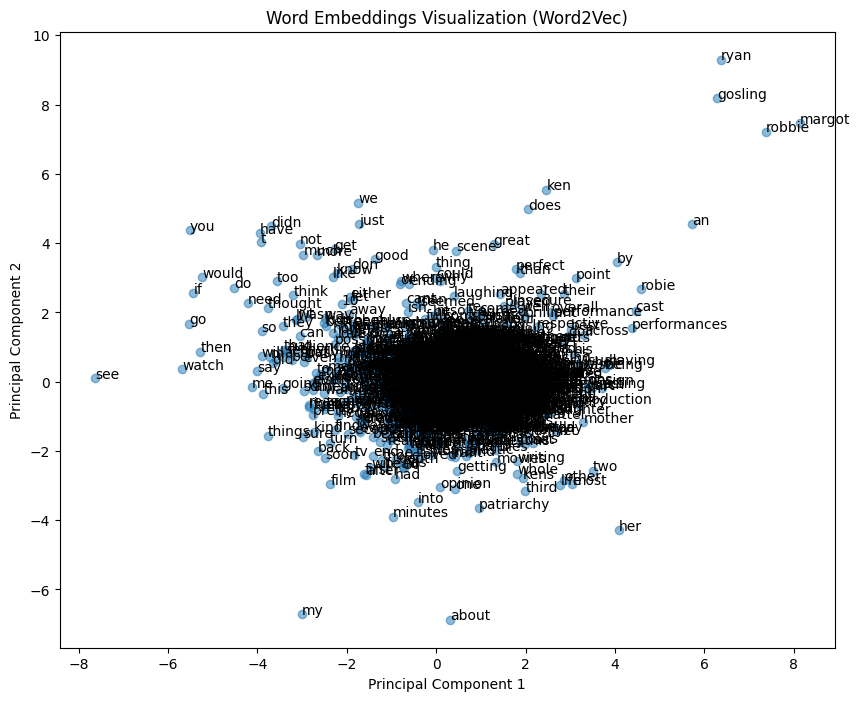

In [4]:
import pandas as pd
import re
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/movie_reviews_with_ratings (1) (2).csv')

# Concatenate all the text data from the 'Review' column
corpus = ' '.join(df['Review'])

# Tokenize the text
sentences = [re.findall(r'\w+', text.lower()) for text in corpus.split('.')]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Visualize the word embeddings
words = list(word_vectors.index_to_key)
vectors = [word_vectors[word] for word in words]

# Perform dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the word vectors in 2D
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embeddings Visualization (Word2Vec)')
plt.show()












## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [7]:
# https://github.com/sailohithkonakanchi/sailohith_INFO5731_Spring2024/blob/5a4dfafc9f03b1ae63bb48650063b8863e8a237d/Movie%20reviews%20after%20sentiment%20analysis.csv




# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [6]:
''''This assignment covers a wide range of tasks in natural language processing, from word embedding to document representation and N-gram analysis. I got a hands-on opportunity to understand and implement fundamental concepts in NLP. I faced challenges in four question to read all the reviews.'''

"'This assignment covers a wide range of tasks in natural language processing, from word embedding to document representation and N-gram analysis. I got a hands-on opportunity to understand and implement fundamental concepts in NLP. I faced challenges in four question to read all the reviews."